<H1>Régression Logistique</H1>

| Variables | Description                                                                                                          |
|-----------------|----------------------------------------------------------------------------------------------------------------------|
| age             | Age of the bank client                                                                                              |
| job             | Type of job of the bank client                                                                                      |
| marital         | Marital status of the bank client                                                                                   |
| education       | Education level of the bank client                                                                                  |
| default         | Whether the client has credit in default or not ("yes" or "no")                                                     |
| balance         | Average yearly balance in euros                                                                                     |
| housing         | Whether the client has a housing loan or not ("yes" or "no")                                                        |
| loan            | Whether the client has a personal loan or not ("yes" or "no")                                                       |
| contact         | Type of contact communication ("unknown", "telephone", "cellular")                                                  |
| day             | Last contact day of the month                                                                                       |
| month           | Last contact month of the year                                                                                      |
| duration        | Last contact duration in seconds                                                                                    |
| campaign        | Number of contacts performed during this campaign and for this client                                               |
| pdays           | Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous        | Number of contacts performed before this campaign and for this client                                               |
| poutcome        | Outcome of the previous marketing campaign ("unknown", "other", "failure", "success")                               |
| **y**              | **Whether the client has subscribed to a term deposit or not ("yes" or "no")**                                          |

## Implementation de code 

In [108]:
# Import des bibliothèques nécessaires
import numpy as np  # Import de la bibliothèque NumPy pour le calcul numérique
import pandas as pd  # Import de la bibliothèque Pandas pour la manipulation des données
import seaborn as sns  # Import de la bibliothèque Seaborn pour la visualisation de données statistiques
import matplotlib.pyplot as plt  # Import de la bibliothèque Matplotlib pour la visualisation de données
import sklearn  # Import de la bibliothèque scikit-learn pour l'apprentissage automatique


In [109]:
data_set = pd.read_csv('bank-full.csv', sep=';')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [110]:
data_set.shape

(45211, 17)

In [111]:
data_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [112]:
# Afficher des informations sur le jeu de données
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [113]:
# Calculer le nombre de valeurs manquantes dans chaque colonne du jeu de données
data_set.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> **Data is clean !**

In [114]:
# Calculer le nombre de valeurs uniques dans chaque colonne du jeu de données
data_set.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [115]:
# Afficher un résumé statistique du jeu de données
data_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [116]:
# Compter le nombre d'occurrences de chaque valeur unique dans la colonne 'y' du jeu de données
data_set['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [117]:
# Calculer le pourcentage de chaque valeur unique dans la colonne 'y' par rapport au nombre total d'entrées
percentage = (data_set['y'].value_counts().values / data_set['y'].count()) * 100

# Afficher les pourcentages calculés
print(percentage)


[88.30151954 11.69848046]


- Une grande proportion des clients, soit 88,30 %, ont décliné l'offre, tandis que seuls 11,70 % l'ont acceptée.

## Analyse Exploratoire des Données EDA


- Catégories de données :
    - Catégoriques : ['emploi', 'matrimonial', 'éducation', 'défaut', 'logement', 'prêt', 'contact', 'mois', 'résultat_précédent', 'y']
    - Numériques : ['âge', 'solde', 'jour', 'durée', 'campagne', 'pdays', 'précédent']

In [118]:
categoricals = list(data_set.select_dtypes(include='object'))
numericals = list(data_set.select_dtypes(include='int64'))

In [119]:
import seaborn as sns  # Import de la bibliothèque Seaborn pour la visualisation de données statistiques
import matplotlib.pyplot as plt  # Import de la bibliothèque Matplotlib pour la visualisation de données

def pltCountplot(data, cats, target='', hue=''):
    num_cols = 2  # Nombre de colonnes dans la grille de tracés
    num_rows = 5  # Nombre de lignes dans la grille de tracés
    fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))  # Création de la figure et des axes
    
    index = 0  # Initialisation de l'index pour parcourir la liste des catégories
    
    # Boucle pour parcourir la grille de tracés
    for i in range(num_rows):
        for j in range(num_cols):
            if index < len(cats):  # Vérification si toutes les catégories ont été traitées
                ax = axis[i][j]  # Sélection de l'axe actuel
                
                # Obtenir l'ordre trié des catégories
                sorted_cats = data[cats[index]].value_counts().index
                
                # Condition pour gérer différents cas de tracé en fonction des arguments fournis
                if not target:
                    if not hue:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=cats[index], order=sorted_cats, legend=True)
                    else:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=hue, order=sorted_cats, legend=True)
                else:
                    if not hue:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=target, order=sorted_cats, legend=True) 
                    else:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=hue, order=sorted_cats, legend=True)
                
                # Configuration de la légende
                ax.legend(
                    title=cats[index],
                    loc='upper right',
                )
                
                # Rotation des étiquettes d'axe pour certaines catégories spécifiques
                if cats[index] in ['job','education', 'marital', 'contact','month']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(30)
                
                # Ajout des pourcentages sur les barres
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(
                        p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center"
                    ) 
                index += 1  # Incrément de l'index pour passer à la prochaine catégorie


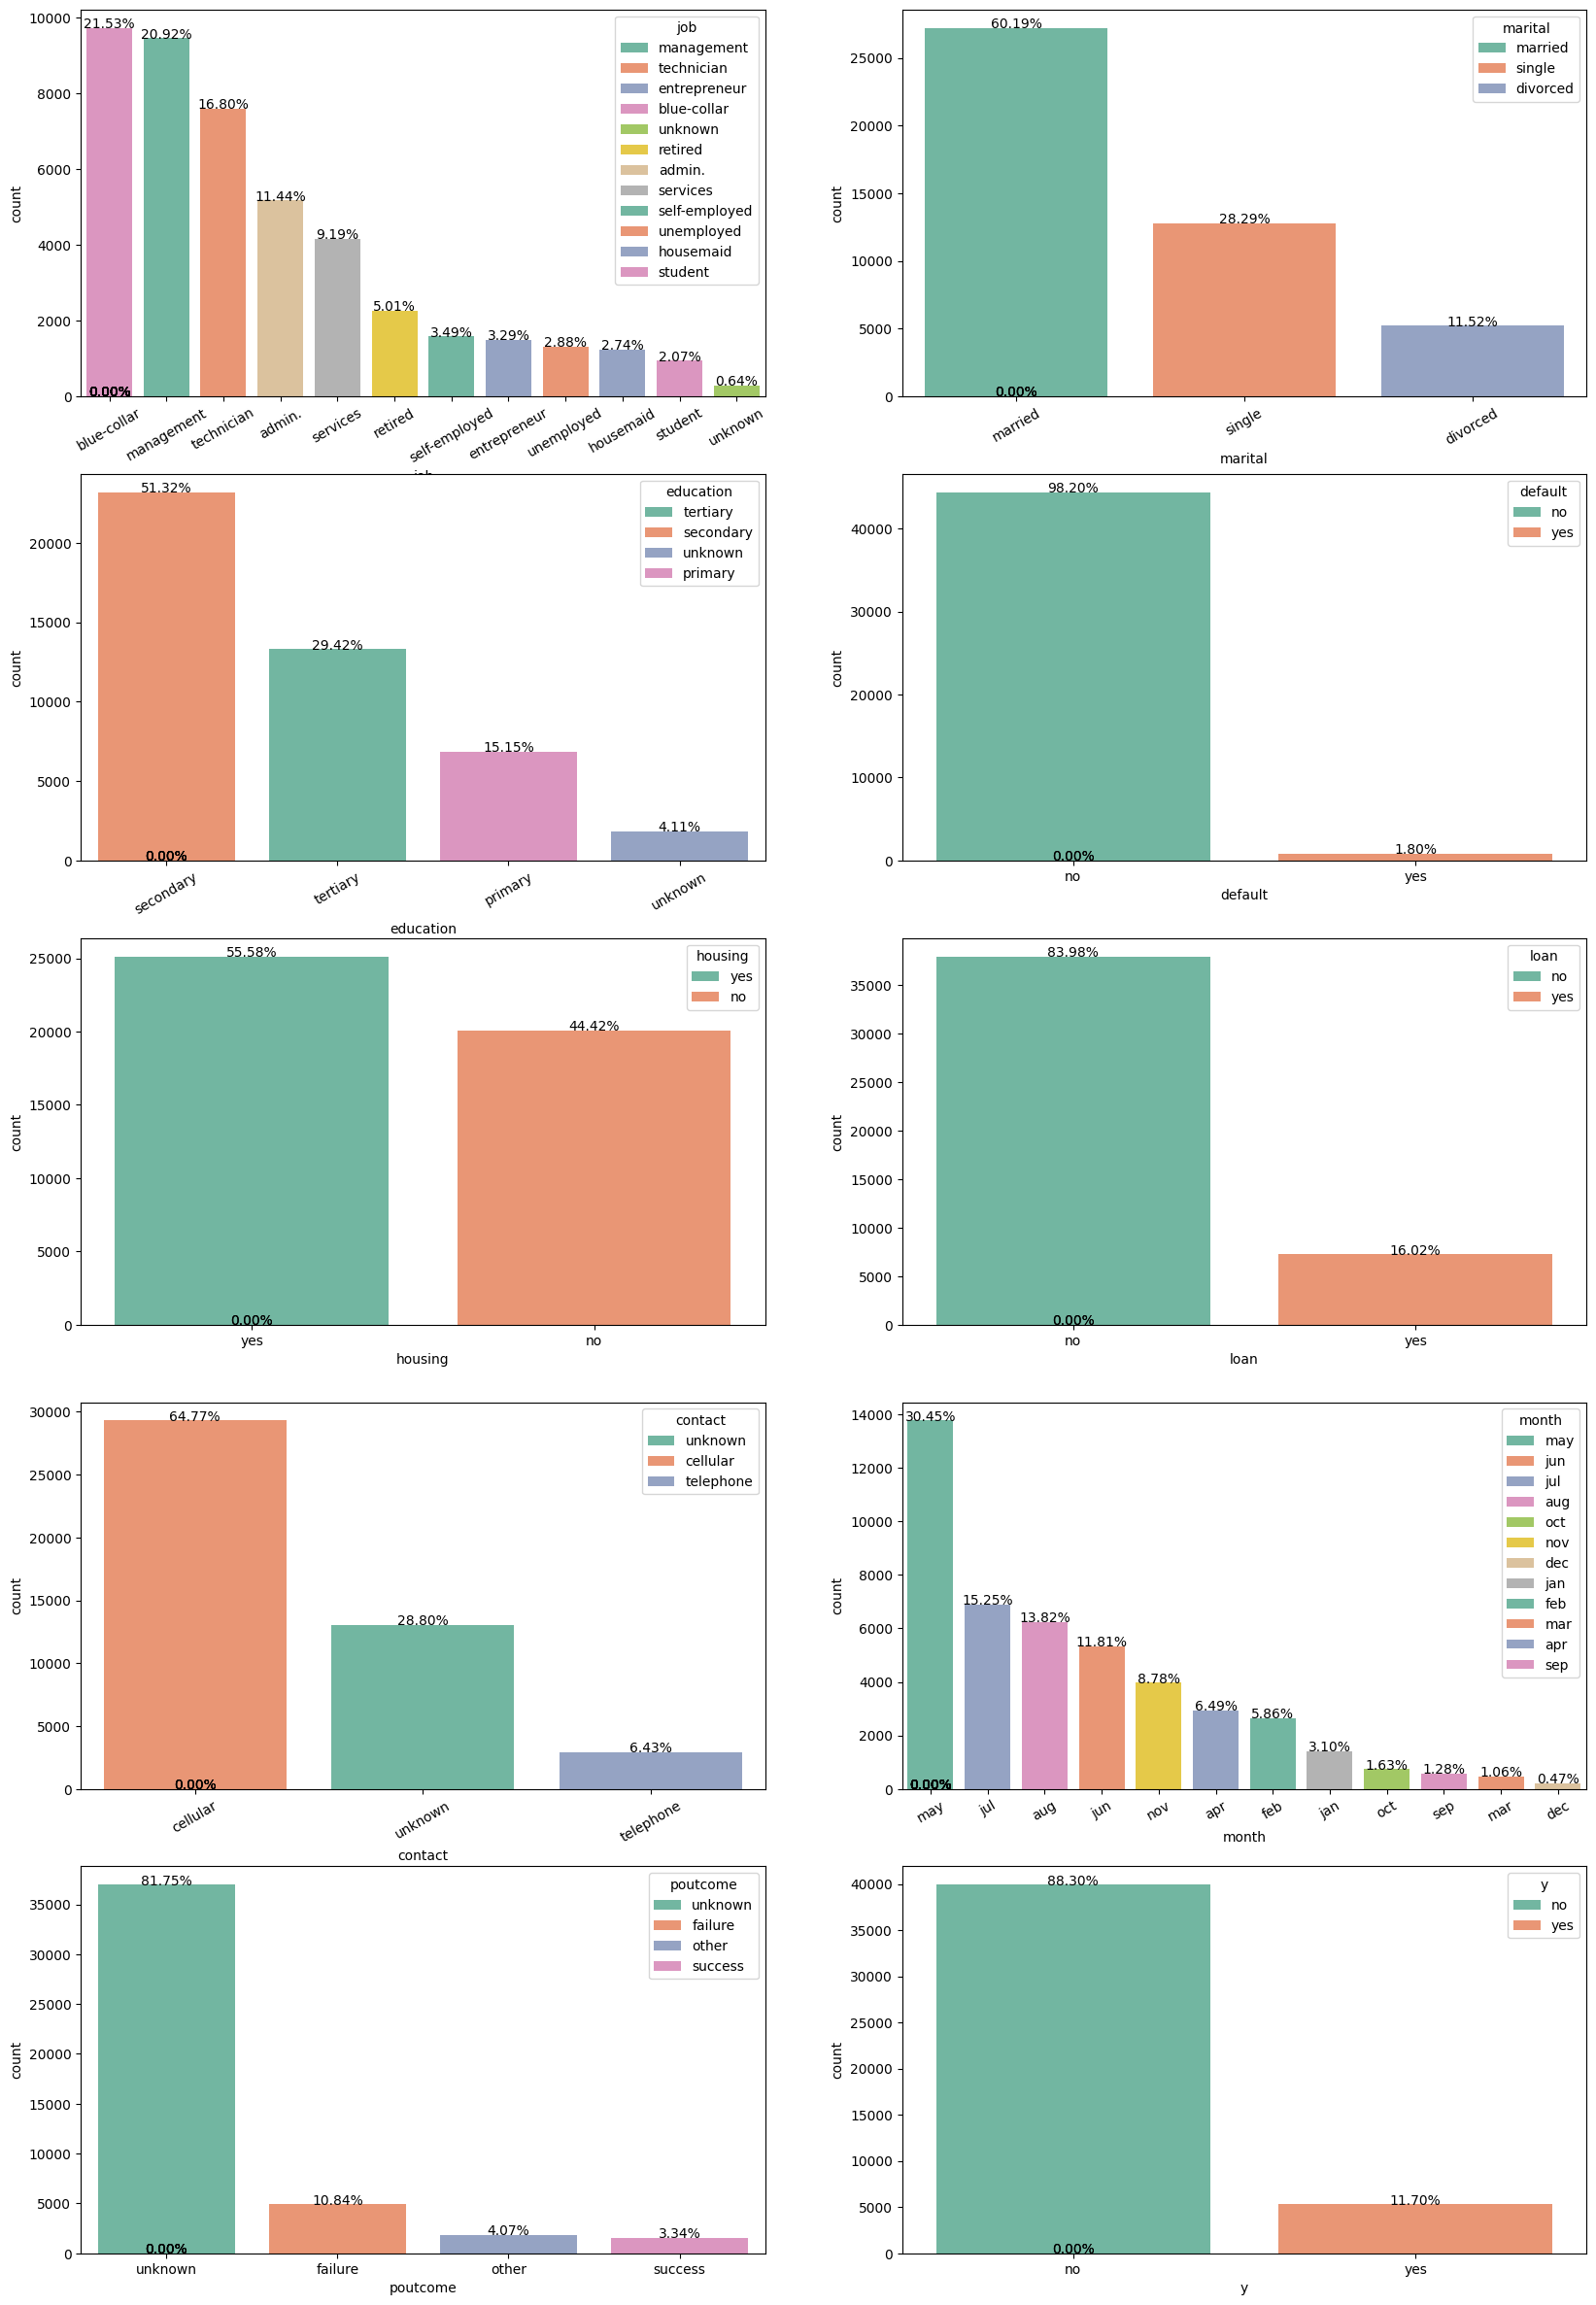

In [120]:
pltCountplot(data_set, categoricals)
# Appelle la fonction pltCountplot pour générer des tracés de comptage basés sur le jeu de données data_set et les colonnes catégorielles spécifiées dans la liste categoricals.

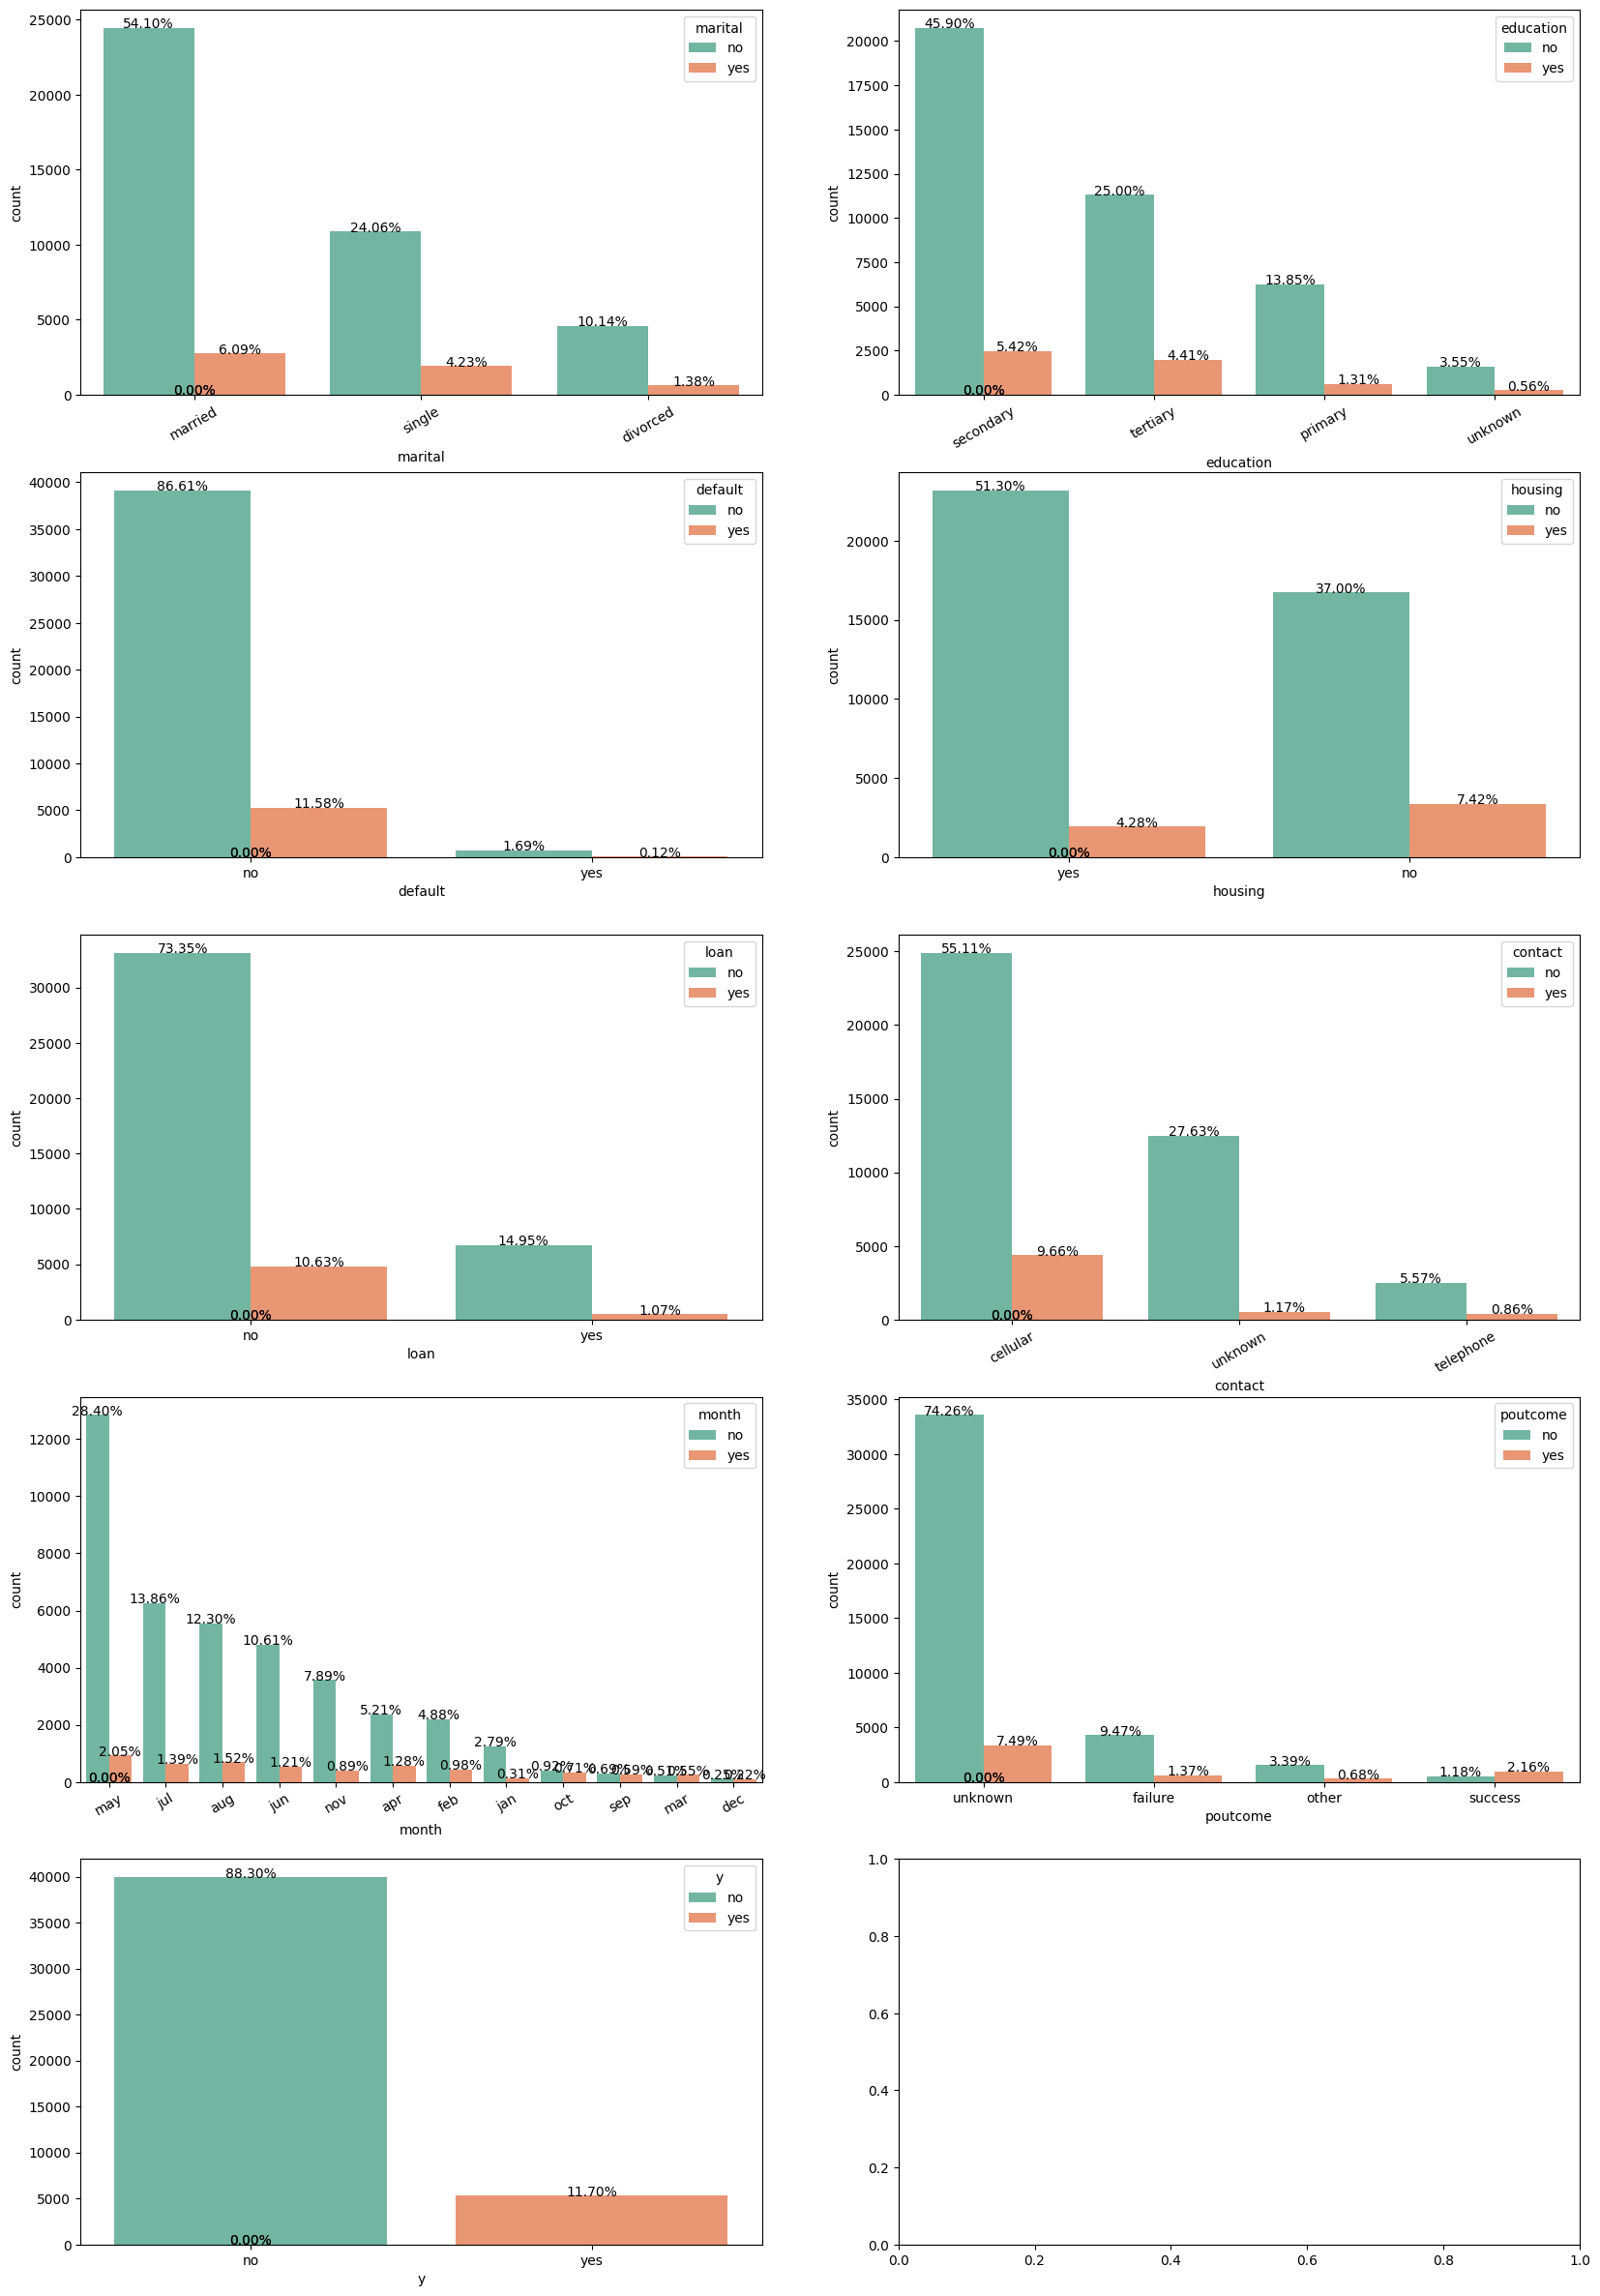

In [121]:
pltCountplot(data_set, categoricals[1:], 'y')
# Appelle la fonction pltCountplot pour générer des tracés de comptage basés sur le jeu de données data_set et les colonnes catégorielles spécifiées dans la liste categoricals, en utilisant la colonne 'y' comme cible.


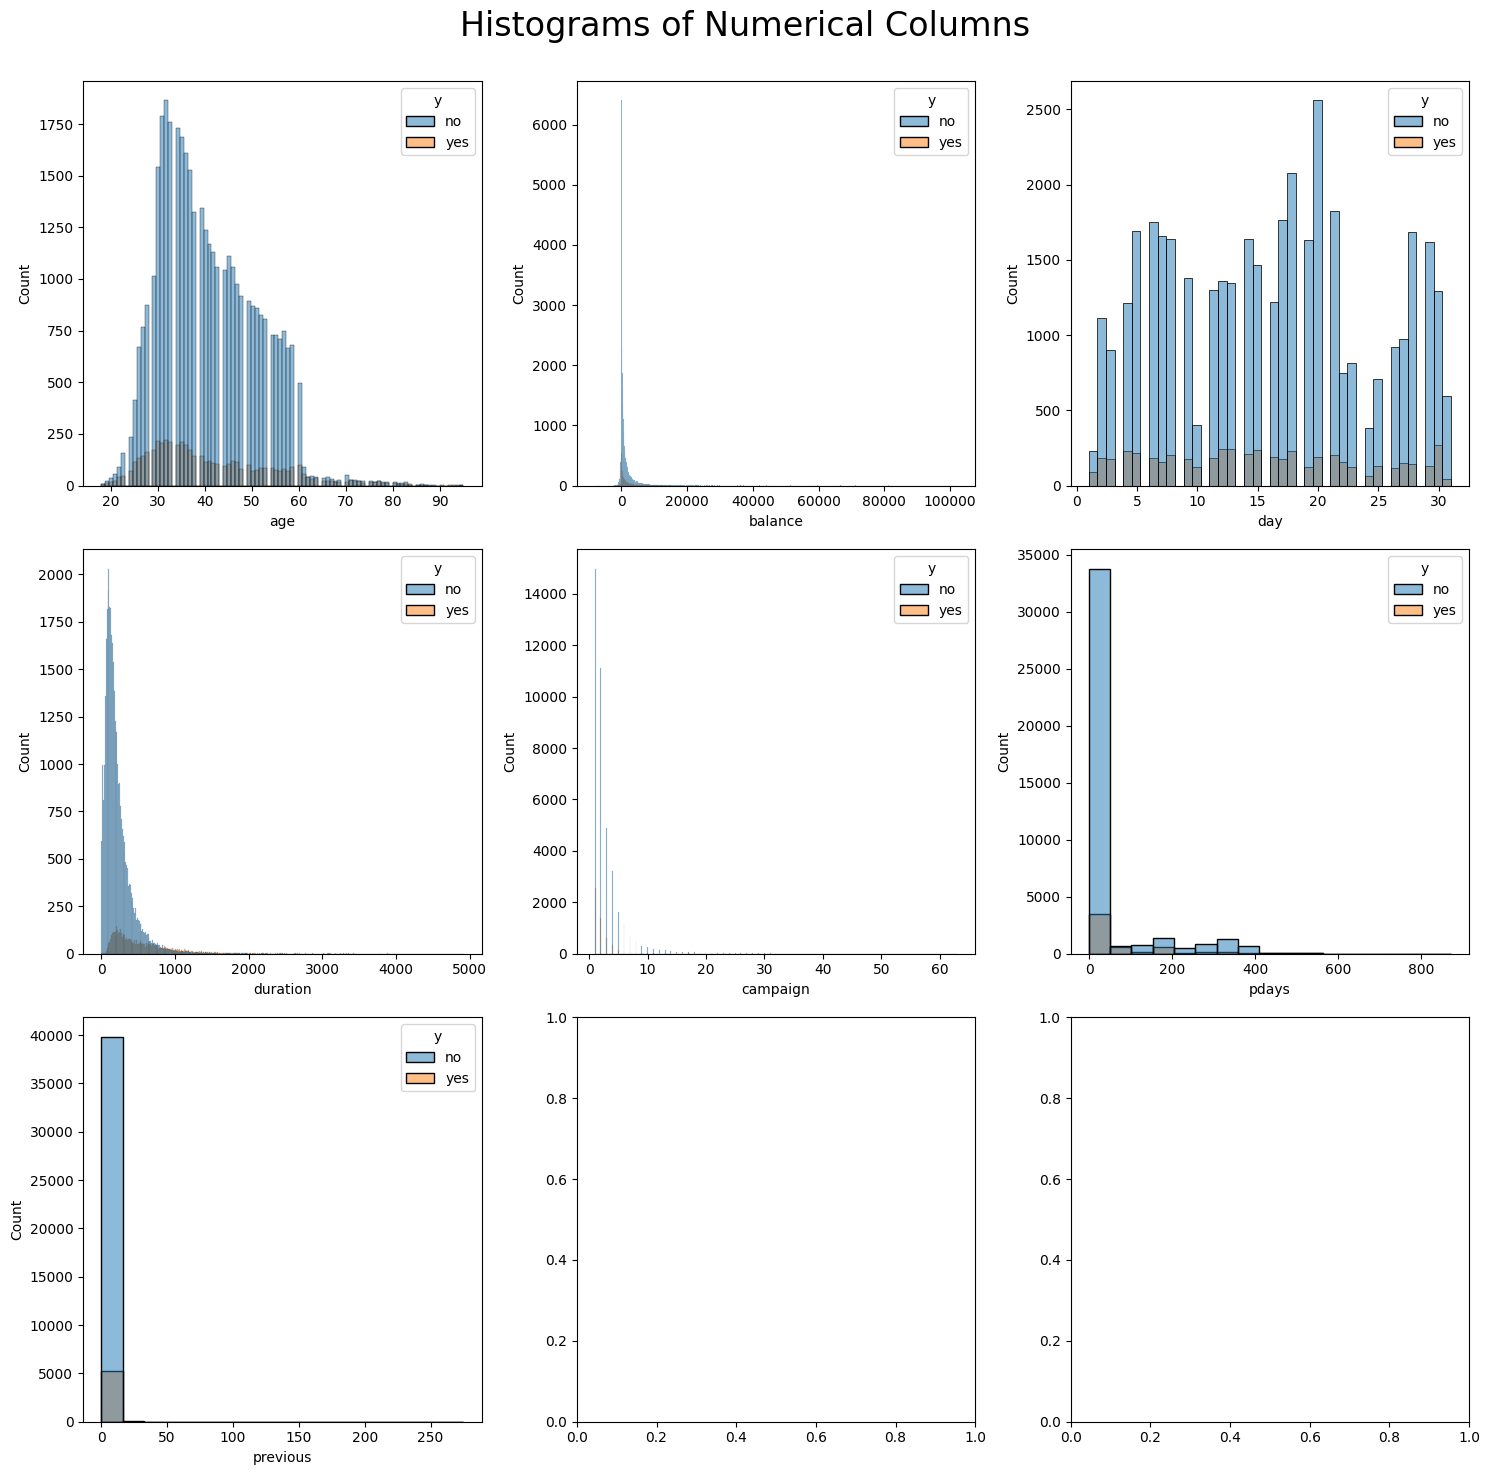

In [122]:
# Calcul du nombre de lignes dans la grille de tracés
norow = len(numericals) // 3 + 1

# Création de la figure et des axes pour les tracés
fig, ax = plt.subplots(norow, 3, figsize=(15, 15))

# Ajout d'un titre à la figure
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

# Boucle pour générer les tracés pour chaque colonne numérique
for i, d in enumerate(numericals):
    if i < 3:  # Si i est inférieur à 3, placez le tracé dans la première ligne
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[0, i], hue='y')
    else:  # Sinon, placez le tracé dans la ligne suivante
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[i // 3, i % 3], hue='y')

# Ajustement de la disposition des tracés
plt.tight_layout()

# Affichage des tracés
plt.show()


<H1>Régression Logistique(implementation)</H1>

In [123]:
from sklearn.preprocessing import LabelEncoder  # Import du LabelEncoder de scikit-learn
df = pd.DataFrame(data_set)  # Création d'un DataFrame à partir du jeu de données data_set
label_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome','default', 'housing', 'loan', 'y']  # Liste des colonnes à encoder

# Boucle pour encoder chaque colonne catégorielle dans label_cols
for col in label_cols:
    le = LabelEncoder()  # Initialisation du LabelEncoder
    df[col] = le.fit_transform(df[col])  # Encodage de la colonne et remplacement des valeurs dans le DataFrame

# Affichage des premières 7 lignes du DataFrame après l'encodage
df.head(7)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Séparation des données en ensembles d'entraînement et de test
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=10000)  # Vous pouvez ajuster le nombre d'itérations selon vos besoins

# Utilisation de la validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 signifie 5 plis dans la validation croisée

# Entraînement du modèle sur l'ensemble d'entraînement complet
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [134]:
# Import des fonctions d'évaluation de la classification depuis scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcul de la précision, du rappel et de l'exactitude en comparant les vraies valeurs (y_test) avec les prédictions (y_pred)
accuracy = accuracy_score(y_test, y_pred)  # Calcul de l'exactitude
precision = precision_score(y_test, y_pred)  # Calcul de la précision
recall = recall_score(y_test, y_pred)  # Calcul du rappel


In [136]:
# Affichage du score d'exactitude avec une précision de 2 décimales
print(f"Score (exactitude) : {accuracy:.2f}")

# Affichage de la précision avec une précision de 2 décimales
print(f"Précision : {precision:.2f}")

# Affichage du rappel avec une précision de 2 décimales
print(f"Rappel : {recall:.2f}")

# Affichage des scores de validation croisée
print("Scores de validation croisée :", cv_scores)

# Calcul de la moyenne des scores de validation croisée et affichage avec une précision de 2 décimales
print(f"Score moyen de validation croisée : {np.mean(cv_scores):.2f}")

# Affichage de la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)


Score (précision) : 0.90
Précision : 0.59
Rappel : 0.22
Scores de validation croisée : [0.88954935 0.88982582 0.8920376  0.89381999 0.89617033]
Score moyen de validation croisée : 0.89
Matrice de confusion :
[[7783  169]
 [ 850  241]]


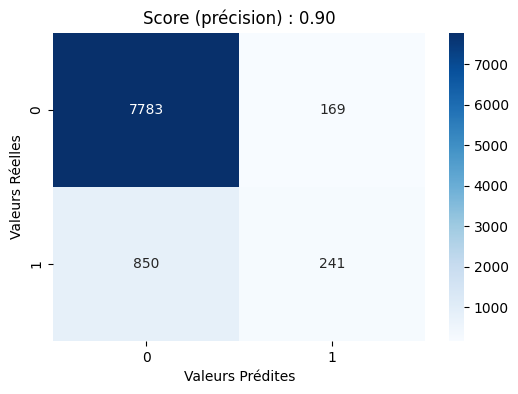

In [137]:
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(6, 4))

# Tracé de la matrice de confusion sous forme de heatmap avec annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Ajout d'étiquettes pour les axes x et y
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')

# Ajout d'un titre à la figure avec le score d'exactitude
plt.title(f"Score (exactitude) : {accuracy:.2f}")

# Affichage de la figure
plt.show()
